In [1]:

from uerl.components.rewarders.pickup_rewarder import PickupRewarderConfig
from uerl.renderer import EpisodeRendererConfig, RendererViewConfig
from uerl.ue_gym_env import UEEnvMultiAgent
from uerl.configs import UELaunchSettings, UEEnvConfig
from uerl.components.sensors.camera_sensor import CameraSensorConfig
from uerl.components.actuators.robot_actuator import RobotMovementActuatorConfig
from uerl.components.terminators.step_counter_terminator import StepCounterTerminatorConfig
from uerl.components.terminators.actors_of_class_finished_terminator import ActorsOfClassFinishedTerminatorConfig
from uerl.components.infos.camera_spectator_info import SpectatorCameraConfig
from uerl.agent.agent_base import AgentConfig, UEAgent
from uerl.types import RenderType

import gymnasium
import numpy as np
from typing import Dict, Any

class RobotAgent(UEAgent):
    def combine_processed_observations(self, observations: Dict[str, Any]) -> Any:
        return observations



# Define the configuration for the environment
# CPU camera, 512x512, 70 FOV (higher resolution than what we would use for proper training)
camera_cpu_conf = CameraSensorConfig(name="camera_cpu",
                                 attach_to_comp_name="CameraComp",
                                 fov=70,
                                 width=512,
                                 height=512,
                                 use_gpu=False,
                                 grayscale=False)


# Camera for debugging purposes
spectator_camera_cpu_conf = SpectatorCameraConfig(name="spectator_camera_cpu",
                                 attach_to_comp_name="",
                                 attach_to_actor_name="SpecCameraActor",
                                 width=512,
                                 height=512,
                                 fov=70,
                                 use_gpu=False,
                                 grayscale=False)


actuator_conf = RobotMovementActuatorConfig(name="my_robot_actuator")
rewarder_pickup_conf = PickupRewarderConfig(name="apples_reward")
terminator_conf = StepCounterTerminatorConfig(name="my_step_terminator",
                                              max_step_count=1000)

agent_obs_space = gymnasium.spaces.Box(low=0.0,
                                 high=255.0,
                                 shape=(512, 512, 3),
                                 dtype=np.uint8)
                                 
agent_action_space = gymnasium.spaces.MultiDiscrete([2, 2, 2, 2, 2])
agent_conf = AgentConfig(
    "Agent1", RobotAgent,
    "/CybertoothML/Agents/RobotAgent/BP_RobotAgent.BP_RobotAgent_C", "Agent1",
    agent_obs_space, agent_action_space, [camera_cpu_conf], [actuator_conf],
    [rewarder_pickup_conf], [terminator_conf], [spectator_camera_cpu_conf])

launch_settings = UELaunchSettings(map_name="CollectApplesMap", 
                                   output_ue_log=True,
                                   # render_type=RenderType.GPU_OFF_SCREEN, # If you want GPU rendering, enable GPU_OFF_SCREEN rendering type
                                   # specific_ip_port=("192.168.1.200", 33333) # If you want to connect to a specific UE instance
                                   executable_path="../games/collect_apples/Linux/RLExamples.sh"
                                   )



ue_conf = UEEnvConfig(launch_settings, [agent_conf], None)


In [2]:
import os

abs_path = os.path.abspath(ue_conf.launch_settings.executable_path)
assert os.path.exists(abs_path), f"The game executable not found at {abs_path}. Please run games/download_games.py"


In [3]:
env = UEEnvMultiAgent(ue_conf)

2025-01-02 15:19:18,046 - uerl.ue_gym_env - INFO - UEEnvMultiAgent.__init__
2025-01-02 15:19:18,047 - uerl.ue_gym_env - INFO - Starting UE5 environment
2025-01-02 15:19:18,047 - uerl.ue_gym_env - INFO - Connecting to the environment. Retrying... (0/5)


Launching UnrealEngine instance with commandline:
	 ../games/collect_apples/Linux/RLExamples.sh CollectApplesMap -nullrhi -onethread -NoVSync -ReduceThreadUsage -unattended -nosound -ws_port 35263
Shutdown handler: initialize.
- Existing per-process limit (soft=1048576, hard=1048576) is enough for us (need only 1048576)
Increasing per-process limit of core file size to infinity.
LogCore: Display: UTS: The Unreal Trace Server binary is not available ('../../../Engine/Binaries/Linux/UnrealTraceServer')
LogTrace: Initializing trace...
LogTrace: Finished trace initialization.
LogCsvProfiler: Display: Metadata set : platform="Linux"
LogCsvProfiler: Display: Metadata set : config="Development"
LogCsvProfiler: Display: Metadata set : buildversion="UE5-CL-0"
LogCsvProfiler: Display: Metadata set : engineversion="5.5.1-0+UE5"
LogCsvProfiler: Display: Metadata set : os="Ubuntu 22.04.3 LTS 5.15.0-127-generic"
LogCsvProfiler: Display: Metadata set : cpu="AuthenticAMD|QEMU Virtual CPU version 2.5+"

2025-01-02 15:19:23,049 - uerl.ue_gym_env - INFO - connecting to ws://localhost:35263
2025-01-02 15:19:23,049 - uerl.ue_gym_env - INFO - connecting to ws://localhost:35263 attempt 0
2025-01-02 15:19:23,059 - uerl.ue_gym_env - INFO - UE5 environment started at localhost:35263


[2025.01.02-15.19.23:052][  0]LogTemp: Warning: *********** INIT STEPS v3
[2025.01.02-15.19.23:058][  0]LogTemp: Warning: GetInfoProviderClass called with InfoProviderName: spectator_camera
[2025.01.02-15.19.23:058][  0]LogTemp: Warning: Class found for InfoProviderName: spectator_camera
[2025.01.02-15.19.23:058][  0]LogTemp: Checking actor: ChaosDebugDrawActor
[2025.01.02-15.19.23:058][  0]LogTemp: Checking actor: SM_SkySphere
[2025.01.02-15.19.23:058][  0]LogTemp: Checking actor: SM_Cube2
[2025.01.02-15.19.23:058][  0]LogTemp: Checking actor: SM_Cube3
[2025.01.02-15.19.23:058][  0]LogTemp: Checking actor: SM_Cube4
[2025.01.02-15.19.23:058][  0]LogTemp: Checking actor: SM_Cube5
[2025.01.02-15.19.23:058][  0]LogTemp: Checking actor: Cube
[2025.01.02-15.19.23:058][  0]LogTemp: Checking actor: SpecCameraActor
[2025.01.02-15.19.23:058][  0]LogTemp: Found actor with matching name: SpecCameraActor


In [4]:
# Now we have an environment fully loaded and ready to receive commands

In [5]:
# Reset the environment before first step
obs, info = env.reset()

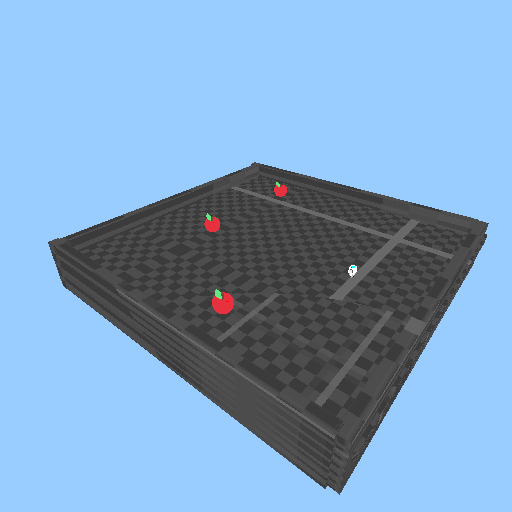

In [6]:
# Use utility func to display the spectator camera view 

from uerl.utils import display_image_in_jupyter
display_image_in_jupyter(info["Agent1"]["spectator_camera_cpu"], target_size=(512,512))

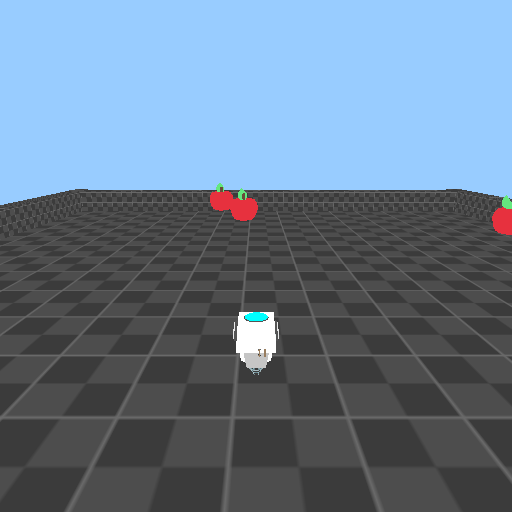

In [16]:
# Display what the agent sees
display_image_in_jupyter(obs["Agent1"]["camera_cpu"], target_size=(512,512))

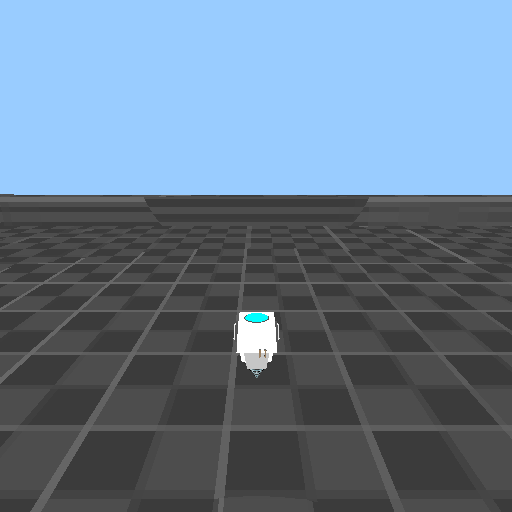

In [ ]:
# Take 10 steps forward, displaying the agents view at each step

from collections import OrderedDict
from IPython.display import display, clear_output
import time
import numpy as np

step_count = 0

obs, info = env.reset()

action = OrderedDict([('Agent1', np.array([1, 0, 0, 0, 0], dtype=np.int64))])
for i in range(30):
    step_count += 1
    time.sleep(0.05) # Intentional delay to make it easier to see the changes
    clear_output(wait=True)
    obs, rewards, terminate, truncated, infos = env.step(action)
    display_image_in_jupyter(obs["Agent1"]["camera_cpu"], target_size=(512,512))
    if terminate["__all__"] or truncated["__all__"]:
        print(step_count)
        break

In [11]:
# Close/stop the environment once we are done
env.close()

close(shutdown=True, RenderType.NO_RENDER)
<Popen: returncode: None args: ['../games/collect_apples/Linux/RLExamples.sh...>


# Multiple agents
Let's try with 2 agents each with their own policy and goals.  
<strong>Agent1</strong> will still try to collect apples while <strong>Agent2</strong> will try to avoid apples.

In [1]:

from uerl.components.rewarders.pickup_rewarder import PickupRewarderConfig
from uerl.renderer import EpisodeRendererConfig, RendererViewConfig
from uerl.ue_gym_env import UEEnvMultiAgent
from uerl.configs import UELaunchSettings, UEEnvConfig
from uerl.components.sensors.camera_sensor import CameraSensorConfig
from uerl.components.actuators.robot_actuator import RobotMovementActuatorConfig
from uerl.components.terminators.step_counter_terminator import StepCounterTerminatorConfig
from uerl.components.terminators.actors_of_class_finished_terminator import ActorsOfClassFinishedTerminatorConfig
from uerl.components.infos.camera_spectator_info import SpectatorCameraConfig
from uerl.agent.agent_base import AgentConfig, UEAgent
from uerl.types import RenderType

import gymnasium
import numpy as np
from typing import Dict, Any

class RobotAgent(UEAgent):
    def combine_processed_observations(self, observations: Dict[str, Any]) -> Any:
        return observations



# Define the configuration for the environment
# CPU camera, 512x512, 70 FOV (higher resolution than what we would use for proper training)
camera_cpu_conf = CameraSensorConfig(name="camera_cpu",
                                 attach_to_comp_name="CameraComp",
                                 fov=70,
                                 width=512,
                                 height=512,
                                 use_gpu=False,
                                 grayscale=False)


# Camera for debugging purposes
spectator_camera_cpu_conf = SpectatorCameraConfig(name="spectator_camera_cpu",
                                 attach_to_comp_name="",
                                 attach_to_actor_name="SpecCameraActor",
                                 width=512,
                                 height=512,
                                 fov=70,
                                 use_gpu=False,
                                 grayscale=False)


actuator_conf = RobotMovementActuatorConfig(name="my_robot_actuator")
rewarder_pickup_conf = PickupRewarderConfig(name="apples_reward")
terminator_conf = StepCounterTerminatorConfig(name="my_step_terminator",
                                              max_step_count=1000)


# We will setup a different rewarder config for the agent2 to avoid apples
rewarder_avoid_apples = PickupRewarderConfig(name="apples_reward", invert_reward=True)



agent_obs_space = gymnasium.spaces.Box(low=0.0,
                                 high=255.0,
                                 shape=(512, 512, 3),
                                 dtype=np.uint8)
                                 
agent_action_space = gymnasium.spaces.MultiDiscrete([2, 2, 2, 2, 2])
agent1_conf = AgentConfig(
    "Agent1", RobotAgent,
    "/CybertoothML/Agents/RobotAgent/BP_RobotAgent.BP_RobotAgent_C", "Agent1",
    agent_obs_space, agent_action_space, [camera_cpu_conf], [actuator_conf],
    [rewarder_pickup_conf], [terminator_conf], [spectator_camera_cpu_conf])


agent2_conf = AgentConfig(
    "Agent2", RobotAgent,
    "/CybertoothML/Agents/RobotAgent/BP_RobotAgent.BP_RobotAgent_C", "Agent2",
    agent_obs_space, agent_action_space, [camera_cpu_conf], [actuator_conf],
    [rewarder_avoid_apples], [terminator_conf], [])


launch_settings = UELaunchSettings(map_name="CollectApplesMap", 
                                   output_ue_log=True,
                                   # render_type=RenderType.GPU_OFF_SCREEN, # If you want GPU rendering, enable GPU_OFF_SCREEN rendering type
                                   # specific_ip_port=("192.168.1.200", 33333) # If you want to connect to a specific UE instance
                                   executable_path="../games/collect_apples/Linux/RLExamples.sh"
                                   )



ue_conf = UEEnvConfig(launch_settings, [agent1_conf, agent2_conf], None)


In [2]:
env = UEEnvMultiAgent(ue_conf)

2025-01-02 15:42:46,441 - uerl.ue_gym_env - INFO - UEEnvMultiAgent.__init__
2025-01-02 15:42:46,442 - uerl.ue_gym_env - INFO - Starting UE5 environment
2025-01-02 15:42:46,442 - uerl.ue_gym_env - INFO - Connecting to the environment. Retrying... (0/5)


Launching UnrealEngine instance with commandline:
	 ../games/collect_apples/Linux/RLExamples.sh CollectApplesMap -nullrhi -onethread -NoVSync -ReduceThreadUsage -unattended -nosound -ws_port 49659
Shutdown handler: initialize.
- Existing per-process limit (soft=1048576, hard=1048576) is enough for us (need only 1048576)
Increasing per-process limit of core file size to infinity.
LogCore: Display: UTS: The Unreal Trace Server binary is not available ('../../../Engine/Binaries/Linux/UnrealTraceServer')
LogTrace: Initializing trace...
LogTrace: Finished trace initialization.
LogCsvProfiler: Display: Metadata set : platform="Linux"
LogCsvProfiler: Display: Metadata set : config="Development"
LogCsvProfiler: Display: Metadata set : buildversion="UE5-CL-0"
LogCsvProfiler: Display: Metadata set : engineversion="5.5.1-0+UE5"
LogCsvProfiler: Display: Metadata set : os="Ubuntu 22.04.3 LTS 5.15.0-127-generic"
LogCsvProfiler: Display: Metadata set : cpu="AuthenticAMD|QEMU Virtual CPU version 2.5+"

2025-01-02 15:42:51,446 - uerl.ue_gym_env - INFO - connecting to ws://localhost:49659
2025-01-02 15:42:51,446 - uerl.ue_gym_env - INFO - connecting to ws://localhost:49659 attempt 0
2025-01-02 15:42:51,456 - uerl.ue_gym_env - INFO - UE5 environment started at localhost:49659


[2025.01.02-15.42.51:449][  0]LogTemp: Warning: *********** INIT STEPS v3
[2025.01.02-15.42.51:455][  0]LogTemp: Warning: GetInfoProviderClass called with InfoProviderName: spectator_camera
[2025.01.02-15.42.51:455][  0]LogTemp: Warning: Class found for InfoProviderName: spectator_camera
[2025.01.02-15.42.51:455][  0]LogTemp: Checking actor: ChaosDebugDrawActor
[2025.01.02-15.42.51:455][  0]LogTemp: Checking actor: SM_SkySphere
[2025.01.02-15.42.51:455][  0]LogTemp: Checking actor: SM_Cube2
[2025.01.02-15.42.51:455][  0]LogTemp: Checking actor: SM_Cube3
[2025.01.02-15.42.51:455][  0]LogTemp: Checking actor: SM_Cube4
[2025.01.02-15.42.51:455][  0]LogTemp: Checking actor: SM_Cube5
[2025.01.02-15.42.51:455][  0]LogTemp: Checking actor: Cube
[2025.01.02-15.42.51:455][  0]LogTemp: Checking actor: SpecCameraActor
[2025.01.02-15.42.51:455][  0]LogTemp: Found actor with matching name: SpecCameraActor
[2025.01.02-15.42.51:456][  0]LogTemp: Warning: GetInfoProviderClass called with InfoProviderN

In [4]:
# Reset the environment before first step
obs, info = env.reset()

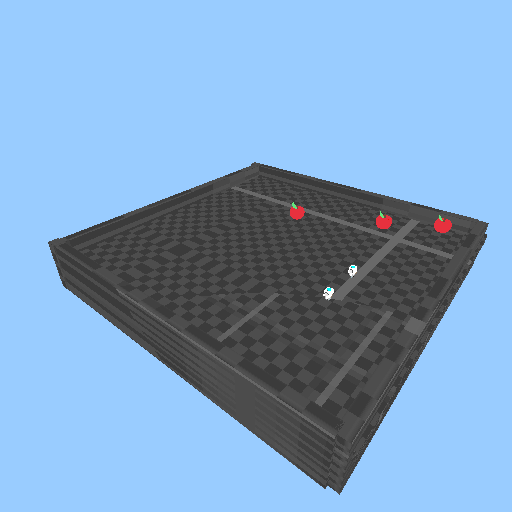

In [5]:
# Use utility func to display the spectator camera view 

from uerl.utils import display_image_in_jupyter
display_image_in_jupyter(info["Agent1"]["spectator_camera_cpu"], target_size=(512,512))

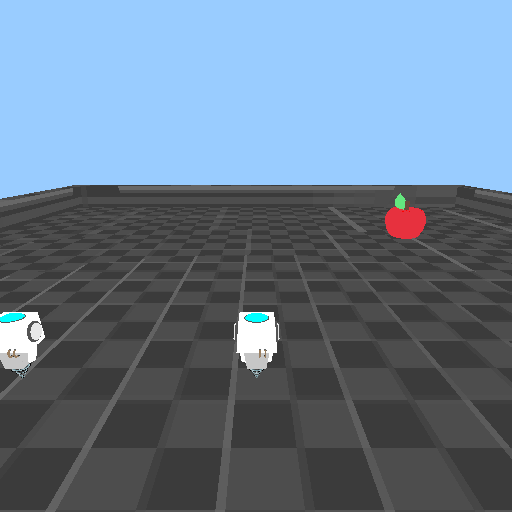

In [6]:
# Display what the Agent1 sees
display_image_in_jupyter(obs["Agent1"]["camera_cpu"], target_size=(512,512))

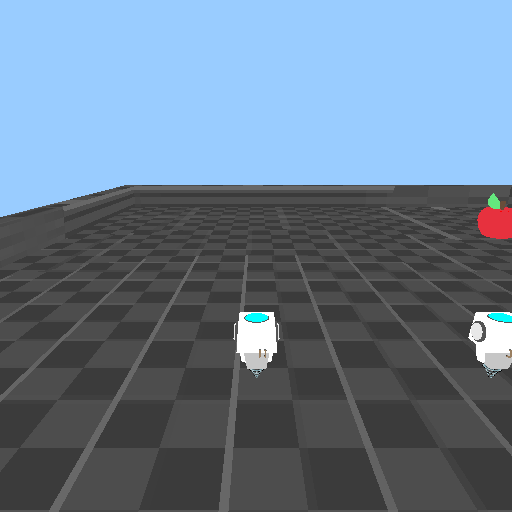

In [7]:
# Display what the Agent1 sees
display_image_in_jupyter(obs["Agent2"]["camera_cpu"], target_size=(512,512))